In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pybaseball as pyb
import sklearn as scikit_learn 

In [3]:
# mapping pitch types to color

pitch_colors = {
    '4-Seam Fastball':'blue',

    'Sinker':'gray',
    
    'Changeup':'orange',
    
    'Curveball':'yellow',
    'Knuckle Curve':'yellow',
    
    'Slurve':'red',
    
    'Slider':'green',
    'Sweeper':'green',
    
    'Cutter':'purple',

    'Split-Finger':'pink',
    'Forkball':'pink',
}

This is a large query, it may take a moment to complete


100%|██████████| 3/3 [00:00<00:00,  3.02it/s]
/var/folders/x6/lj58q9j5449c0rqjl1051vv40000gn/T/ipykernel_39917/497554214.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movement_data['pitch_color'] = movement_data['pitch_name'].map(pitch_colors)


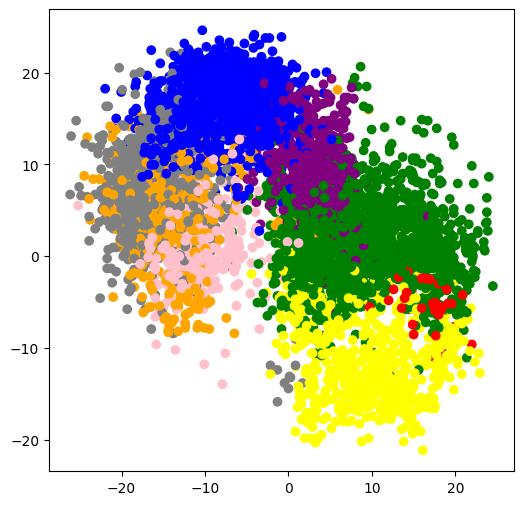

In [4]:
# wanting to visualize what the plot looked like

data = pyb.statcast('2024-03-28', '2024-03-30')

data['pfx_x'], data['pfx_z'] = data['pfx_x'] * 12, data['pfx_z'] * 12

# filtering out pitching arm because i'm too lazy to figure out how to flip arm-side movement
data = data[data['p_throws'] == 'R']
# also filtering out some pitch types
excluded_values = ['Pitch Out', 'Other', 'Eephus']
data = data[~data['pitch_name'].isin(excluded_values)]

# dropping na values for only the pitch_name column
data.dropna(subset=['pitch_name'], inplace=True)

# making a dataframe with only pfx_x, pfx_z
movement_data = data[['pitch_name','pfx_x', 'pfx_z']]

# used below code line to check types of pitches and which to remove
# print(movement_data['pitch_name'].unique())

pitch_types = movement_data['pitch_name'].unique()

# mapping colors to pitches 
# essentially creating a new column
movement_data['pitch_color'] = movement_data['pitch_name'].map(pitch_colors) 

def movement_profile(data):
    plt.figure(figsize=(6,6))
    plt.scatter(data['pfx_x'], data['pfx_z'], c=data['pitch_color'])


movement_profile(movement_data)
